# Musicboard API Extraction

This notebook demonstrates how to fetch data from a website using a REST API. 
We will walk through the process of sending an HTTP request to an API 
handling the response, and converting the data into a usable format.

But before we dive straight into getting information regarding getting data from Musicboard's API, I feel like it's important to discuss a little more about APIs and data extraction.

## APIs, Data Extraction

APIs (Application Programming Interfaces) are sets of rules and protocols that allow different software applications to communicate with each other. They serve as a bridge that enables one system to request and exchange data or services from another system without needing to understand its internal workings. They're used in many websites to allow for getting structured data easily, and allow for scalability and automation across many different platforms. In the field of data science, they are especially useful because they are an easy gateway to vast amounts of data such as weather information (OpenWeather, NOAA), stocks/financial information (Tiingo, Alpha Vantage), among many, *many* other applications.

### A Quick Note on Legality

I want to leave a disclaimer on this point because training data gathered from outside resources is in both a legal and moral grey area. The primary concern stems from collecting large amounts of personal or copyrighted information to train ML models or improve a product. Some websites are more open to using their data for CS purposes (e.g. Wikipedia). In a recent high-profile example, OpenAI is being sued from multiple angles for the data they collected to train their models like ChatGPT and DALL-E. There's a reason why websites like Twitter and Reddit recently started to severely restrict their APIs (even if in doing so kneecapped research), and even Spotify added a little clause in their API saying that their data "may not be used to train machine learning or AI model".

Luckily, as college students developing personal projects, the probability a company will come after you for using their data is extremely small, and far less than a company using their data for commercial purposes. That being said, to avoid any potential implications, I strongly recommend you to **never upload any data of any kind to your Github portfolio**. This applies for any data pulled from Musicboard, APIs/Webscraping from other sources, or even datasets from Kaggle. The reason for this is to reduce the risk of getting contacted by these companies, and to maximize the space you have in your repo (recall that Github is more-so a space to upload code and relevant files, and not a file storage space like Google Drive, hence the file size limits is ~100MB). You can store any relevant data files while not uploading them to Github by using a .gitignore file.

### Getting Started

Musicboard's API is built off of the Django REST Framework. For this tutotial, you do need to have prior knowledge of Django.

First, make sure that you have the necessary libraries installed. We will continue to use the NumPy and Pandas libraries, but we will also introduce two new libraries for this week. For REST API requests, we'll use the `requests` and `json` libraries.
```

In [31]:
# You do not need to run the command below if you already have requests installed.
# You should not need to install the json library, as it's a standard Python library.
!pip install requests

Defaulting to user installation because normal site-packages is not writeable


In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json

In any website, we use APIs to be able to retrieve information from servers and be able to display it on any device, whether it be a mobile app, a desktop website, or the browser on the display smart fridges at the Home Depot. For many websites (including Musicboard), we can see information being fetched from these APIs by their incoming network traffic, visible via your browser's Inspect Element/Developer Tools feature. You can find this by right clicking on (most) pages, or for the shortcut:
* **Windows Users:** Ctrl + Shift + I *OR* F12
* **Mac Users:** Cmd + Option + I (Chromium browsers + Firefox), *OR* Cmd + Option + C (Safari)
  * (if I got the mac commands wrong I apologize, I don't have a mac on me to verify this myself lol)

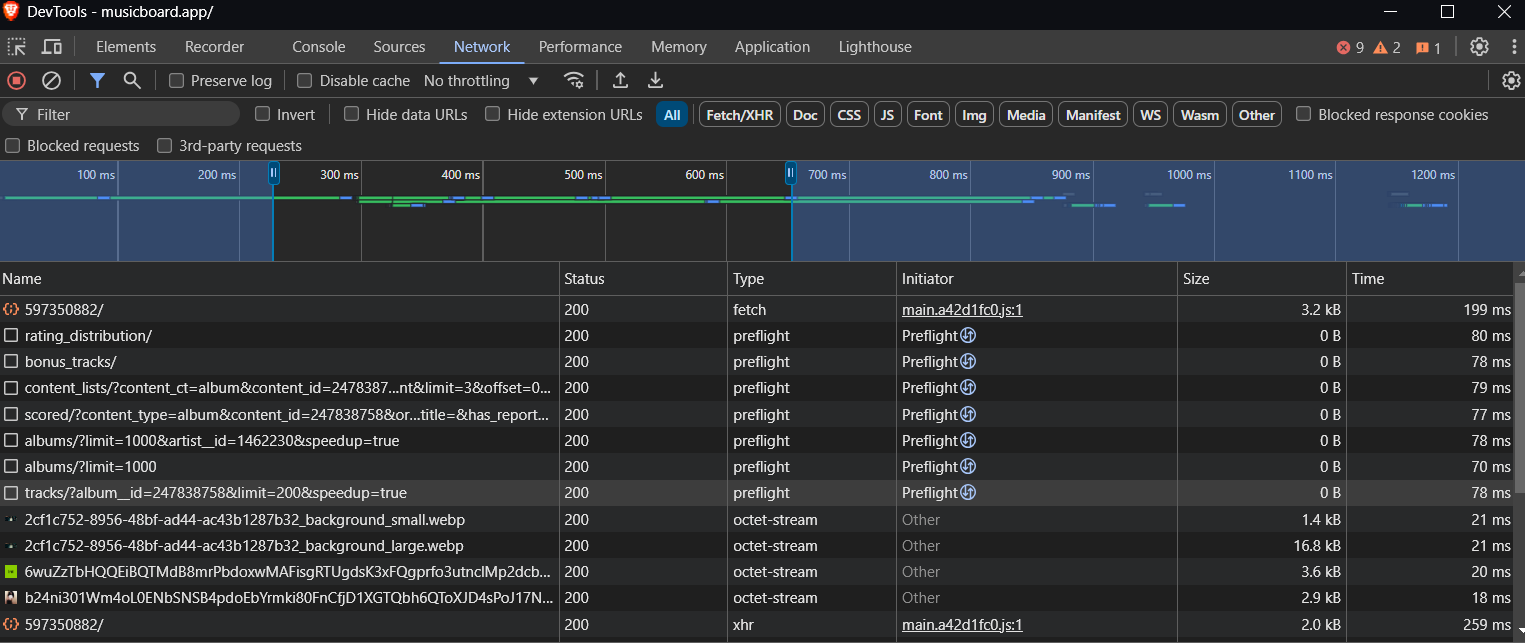

*Image: Sample Network Tab Example for a Musicpage on Musicboard.*

**NOTE:** Some APIs require authentication if you'd like to be able to get information from them, in the form of items like API keys, JWT, bearer tokens, etc. These are more common for larger platforms and makes obtaining data more difficult if you don't have that information

Let's get the ratings for an album! Let's search up for an album with a modest\* amount of ratings. Below, I am getting the ratings for an album *Bloom* by Beach House, screenshot of the webpage and network tab displayed below.

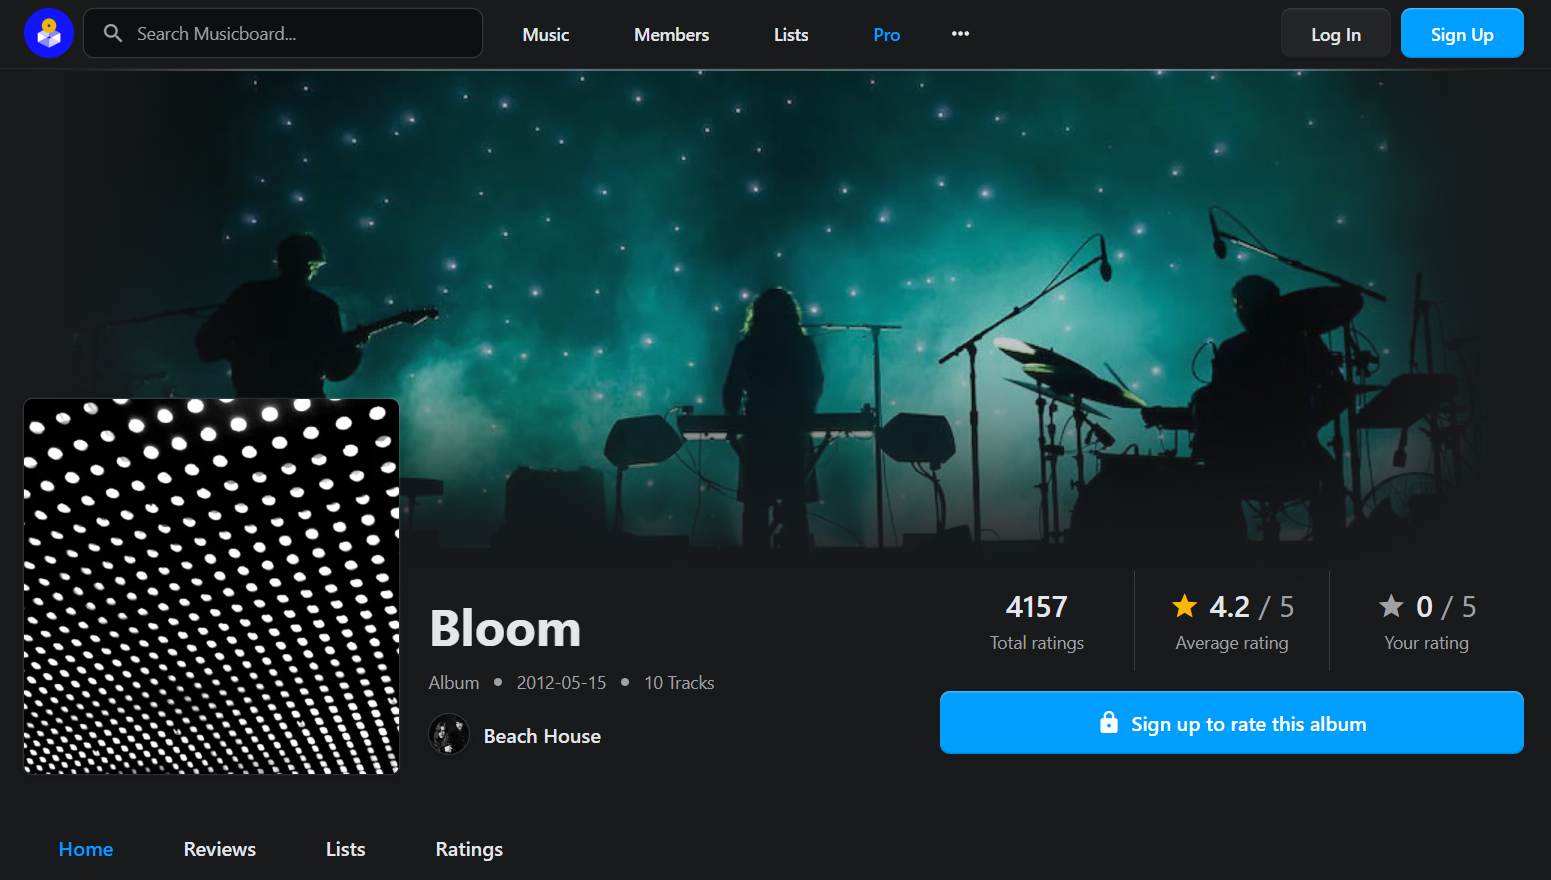

When we click on the "Ratings" tab for the album, and we filter our Network tab results to *only* get Fetch/XHR values, we can get useful info on the Musicboard API. The previous network tab screenshot demonstrated all incoming traffic, and that included stuff like JavaScript files, images, CSS files, and a bunch of other stuff that we realistically don't care about; for our API, what we care about most is seen in the "Fetch/XHR" section because that is where we can get text information and API calls. Below is a screenshot of some of the Fetch/XHR entities from just being on the page and seeing the home and ratings pages for the album; one of these API calls is highlighted and more info is shown as well.

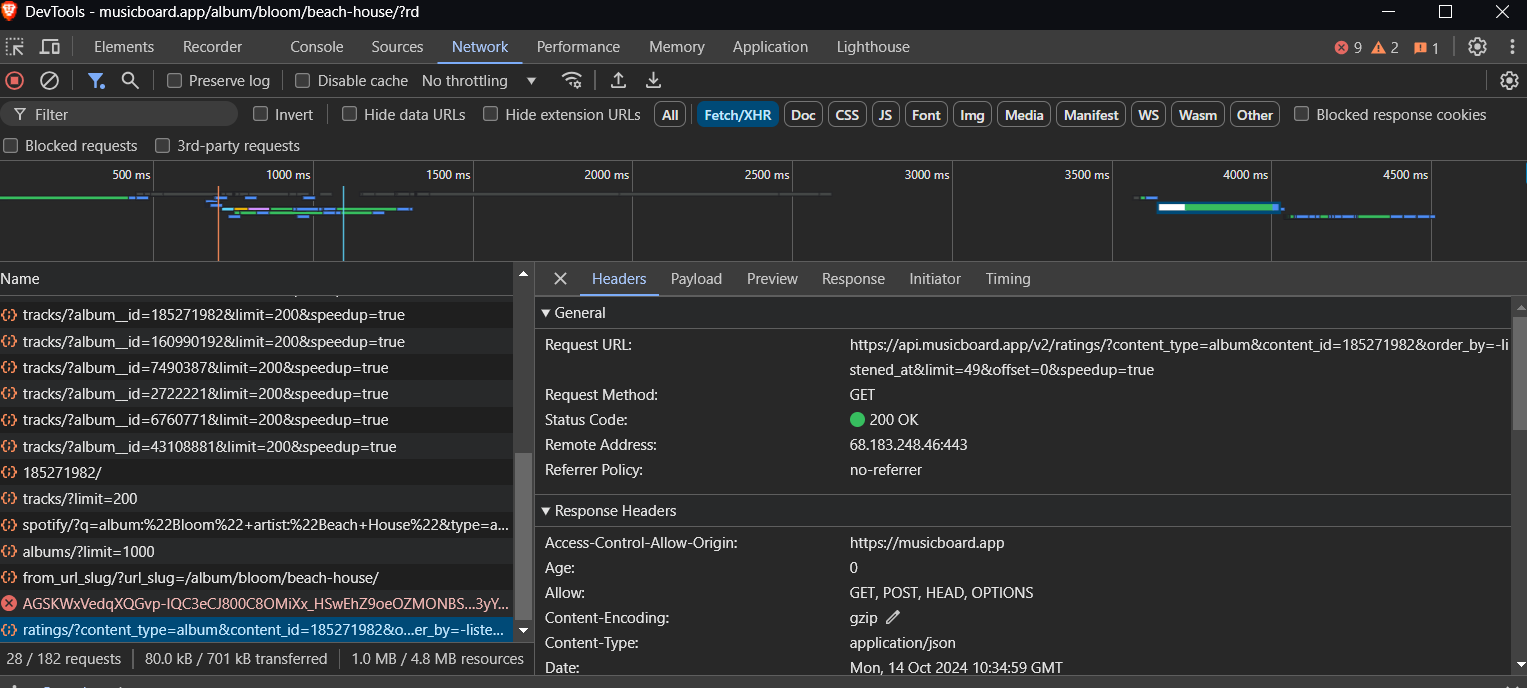

From the highlighted API call above, we can see there's now some more sub-groups that provide more information on the API call we highlighted. In the tab visible to us now, the *header*, we can see the exact URL link of the API, details like the response code (200 if information was retrieved successfully, 4XX or 5XX if something's gone wrong, etc.), and where we would see details on authorization if our API call was utilizing that (but in our case, we don't need to worry). We can see the exact information we received in the *response* tab; we can also get those exact same results by copy pasting the URL to a new tab.

\*There is an interesting quirk with the API for albums with a large number of ratings (typically >5000), but put a pin on that for now and don't forget it.

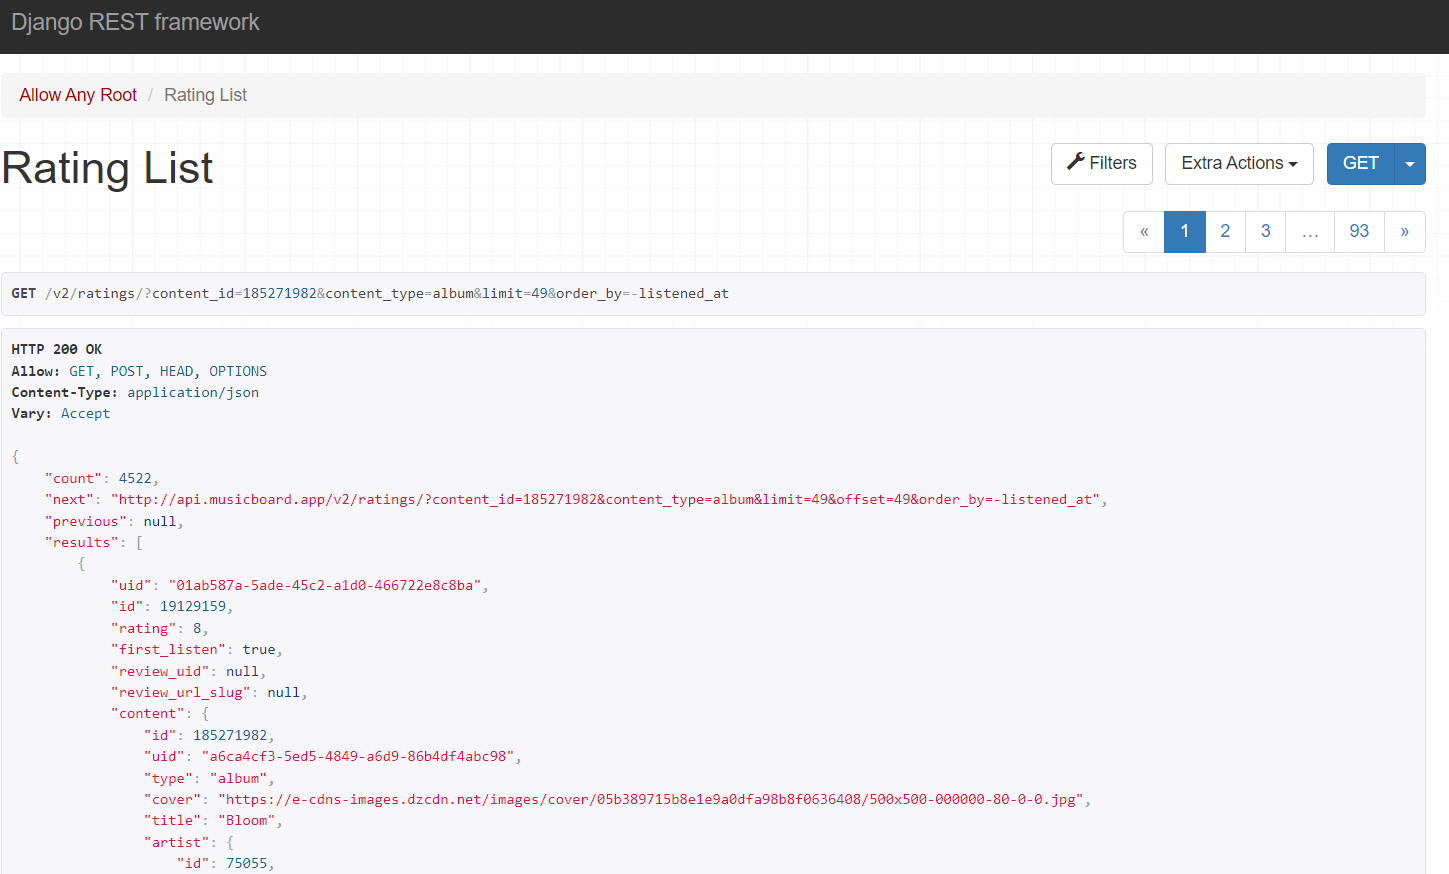

Here is what the API looks like if you follow the link. I did make one slight change by removing the *&speedup=true* at the end, just so we could see the 'count' value in our API. Here, we can see that our data is neatly formatted, thanks to our API being given to us in a JSON format! Though it's not immediately clear, this API call is still referring to *Bloom*, the album I showed off at the beginning of this markdown section. It's just that it's assigned the ID 185271982 in the backend. Here, we have access to all of the ratings left by users on this album, all 4522 ratings!

Let's go ahead and collect some ratings. I'll be using a slightly different album, but the extraction process for any album should be the same. Let's just get all of the ratings and find the average.

In [146]:
album_id = 248043684
url = f"https://api.musicboard.app/v2/ratings/?content_id={album_id}&content_type=album"
ratings = []
offset = 0
response = requests.get(url)
results = json.loads(response.text)
while (offset < results['count']):
    for entry in results['results']:
        if entry['rating']:
            ratings.append(entry['rating'])
    offset += 24
    print(offset)
    if offset <= results['count']:
        response = requests.get(results['next'])
        results = json.loads(response.text)

print(len(ratings), sum(ratings)/len(ratings))

24
48
72
96
120
144
168
192
216
240
264
288
312
336
360
384
408
432
456
480
504
528
552
576
600
624
648
672
696
720
744
768
792
816
840
864
888
912
936
960
984
1008
1032
1056
1080
1104
1128
1152
1176
1200
1224
1248
1272
1296
1320
1344
1368
1392
1416
1440
1464
1488
1512
1536
1560
1584
1608
1632
1656
1680
1704
1728
1752
1776
1800
1824
1848
1872
1896
1920
1944
1968
1992
2016
2040
2064
2088
2112
2136
2160
2184
2208
2232
2256
2280
2304
2328
2352
2376
2400
2424
2448
2472
2496
2520
2544
2568
2592
2616
2640
2664
2688
2712
2736
2760
2784
2808
2832
2856
2880
2904
2928
2952
2976
3000
3024
3048
3072
3096
3120
3144
3168
3192
3216
3240
3264
3288
3312
3336
3078 8.717673814165043


Good stuff! For this album (*Imaginal Disk* by Magdalena Bay (btw this is a great album if you're into synthpop)), we can see that there have been 3078 ratings with an average rating of 8.72 out of 10! Note that the exact figures might be slightly different if you run this again in the future, but we're not so concerned with specifics here.

Let's take it a step further. Let's get some of the same information from the Netflix Prize. For the ratings themselves, let's get the users\*, the album IDs (in this case, just one album), the timestamp they rated the album, and their rating! Of course, when building the actual model, you're more than free to get more information to add to your model, either from the API (from the same ratings call or from another Musicboard API call, like albums info) or elsewhere (we'll cover this point later on).

\*Note: Due to privacy laws, it is strongly *not* recommended to store personally identifiable information in whatever application you're developing. In this case, instead of getting the usernames, we'll be getting users by their user ID, represented by a GUID. If you want to be extra secure, you could also create your own form of identification for these users (e.g. hashing your own GUID), but let's just keep it simple and get the already existing GUID.

In [148]:
album_id = 248043684
url = f"https://api.musicboard.app/v2/ratings/?content_id={album_id}&content_type=album"
creators = []
ratings = []
timestamps = []
offset = 0
response = requests.get(url)
results = json.loads(response.text)
while (offset < results['count']):
    for entry in results['results']:
        if entry['rating']:
            ratings.append(entry['rating'])
            creators.append(entry['creator']['uid'])
            timestamps.append(entry['created_at'])
    offset += 24
    print(offset)
    if results['next']:
        response = requests.get(results['next'])
        results = json.loads(response.text)
    else:
        break

df = pd.DataFrame({
    'User': creators,
    'Album': album_id,
    'Rating': ratings,
    'Timestamp': timestamps
})

display(df)

24
48
72
96
120
144
168
192
216
240
264
288
312
336
360
384
408
432
456
480
504
528
552
576
600
624
648
672
696
720
744
768
792
816
840
864
888
912
936
960
984
1008
1032
1056
1080
1104
1128
1152
1176
1200
1224
1248
1272
1296
1320
1344
1368
1392
1416
1440
1464
1488
1512
1536
1560
1584
1608
1632
1656
1680
1704
1728
1752
1776
1800
1824
1848
1872
1896
1920
1944
1968
1992
2016
2040
2064
2088
2112
2136
2160
2184
2208
2232
2256
2280
2304
2328
2352
2376
2400
2424
2448
2472
2496
2520
2544
2568
2592
2616
2640
2664
2688
2712
2736
2760
2784
2808
2832
2856
2880
2904
2928
2952
2976
3000
3024
3048
3072
3096
3120
3144
3168
3192
3216
3240
3264
3288
3312
3336


,User,Album,Rating,Timestamp
0,17317bd1-520d-407d-9c8c-7f9ab581890d,248043684,10,2024-10-10T23:24:22.722039Z
1,d12b4b91-745c-49af-8f5c-737f6465ac79,248043684,7,2024-10-10T22:20:00.601974Z
2,ce671c46-db90-451f-b0b5-52b38a9009dd,248043684,6,2024-10-10T20:14:49.455666Z
3,ce671c46-db90-451f-b0b5-52b38a9009dd,248043684,7,2024-10-10T20:14:14.576839Z
4,c83bf8bd-be05-4eef-bba0-380388868606,248043684,9,2024-10-10T19:55:05.002097Z
...,...,...,...,...
3073,3abf6300-011d-4552-b7d2-2be453e3fe2e,248043684,10,2024-08-22T20:56:43.393798Z
3074,2a9fc02f-623b-4391-9db7-84edae9c8928,248043684,9,2024-08-22T20:18:48.210614Z
3075,847b1345-1a0e-49cb-a454-e3dbd9c70607,248043684,10,2024-08-22T18:09:03.809299Z
3076,2adcd49d-afc6-420e-85eb-fb0bc4e96e83,248043684,10,2024-08-22T16:58:19.559020Z


OK, good stuff!

However, I do want to point out a slight problem... this does include multiple ratings from the same user. To show this, keep in mind that we have a little over 3k ratings (as of writing this markdown), but when we run the command below to count number of unique users...

In [150]:
len(pd.unique(df['User']))

2946

...we see we have slightly *less* than 3k users. It's a dumb feature from Musicboard (I guess they have it so people could show their opinions have changed over time), but in my model, I want to have only one rating per user. After all, our rec system will be confused if we see multiple ratings! You can choose however you'd like to accomodate these ratings - choose the first rating, take the mean - but I want to get just the most recent rating, and remove all other ratings. This is one instance of data cleaning from our acquired data! Even though we got our data pretty nicely, we still need to ensure that our data is clean enough so that our models can give us good results! If we have bad, unclean data, we're going to get bad results; garbage in, garbage out.

In [152]:
df = df.loc[df.groupby('User')['Timestamp'].idxmax()]
display(df.head())
df.info()

,User,Album,Rating,Timestamp
731,001113ff-a269-4a4e-a29e-a56fe6b8dda0,248043684,8,2024-09-16T09:52:23.104065Z
2255,0015017d-6280-44e2-b484-a015b13098ad,248043684,9,2024-08-27T20:32:50.646941Z
2416,002851ee-13ed-4458-9713-f4d79f711650,248043684,7,2024-08-26T20:06:50.797810Z
796,00416d2f-2e56-46dc-b2d6-f421bf8ed4f9,248043684,3,2024-09-14T21:38:58.649164Z
1140,0046b150-912d-42cf-bd00-c69852c0117b,248043684,8,2024-09-08T21:36:28.079630Z


<class 'pandas.core.frame.DataFrame'>
Index: 2946 entries, 731 to 2465
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   User       2946 non-null   object
 1   Album      2946 non-null   int64 
 2   Rating     2946 non-null   int64 
 3   Timestamp  2946 non-null   object
dtypes: int64(2), object(2)
memory usage: 115.1+ KB


In [154]:
df[df['User'] == "ce671c46-db90-451f-b0b5-52b38a9009dd"]

,User,Album,Rating,Timestamp
2,ce671c46-db90-451f-b0b5-52b38a9009dd,248043684,6,2024-10-10T20:14:49.455666Z


### 510?

oh hey here's that pin I was talking about from earlier you better not have forgotten about it

So, one thing that is interesting is that for albums that are really popular on Musicboard (normally more than 5000 ratings), you will run into a 510 error from the database. You can try this yourself: find a popular album (e.g. *IGOR* or *Abbey Road*), go to the API link, and try going to the last page of ratings - you can't! The reason for this is likely due to technical limitations on behalf of Musicboard - this is something that we, as data extractors, cannot change, and have to navigate around.

To illustrate this example in code form, I took the album ID for *brat* by Charli XCX (an album with some 15k ratings) and try running to get all ratings. In this case, the code will not crash because of the additional stipend I put in the while statement `results != "Unable to communicate with server." and `, but if you just kept the `offset < results['count']`, you *will* run into a crash.

In [160]:
album_id = 247838758
offset = 5001 # you can set this to like 5000 if you don't want to wait
url = f"https://api.musicboard.app/v2/ratings/?content_id={album_id}&content_type=album&offset={offset}"
creators = []
ratings = []
timestamps = []
response = requests.get(url)
results = json.loads(response.text)
while (results != "Unable to communicate with server." and offset < results['count']):
    # 
    for entry in results['results']:
        if entry['rating']:
            ratings.append(entry['rating'])
            creators.append(entry['creator']['uid'])
            timestamps.append(entry['created_at'])
    offset += 24
    if offset % 120 == 0 or offset > 5000:
        print(offset)
    if results['next']:
        response = requests.get(results['next'])
        results = json.loads(response.text)
    else:
        break

df = pd.DataFrame({
    'User': creators,
    'Album': album_id,
    'Rating': ratings,
    'Timestamp': timestamps
})

display(df)

5025
5049
5073


,User,Album,Rating,Timestamp
0,8627c011-169c-47df-9a23-f0f5f4ebb1dc,247838758,9,2024-08-05T07:40:45.629419Z
1,9d3a2629-2f8b-488d-9647-12f291c457f4,247838758,8,2024-08-05T07:31:22.032434Z
2,aec3504f-b5e9-42e2-9928-8dfeb097ce5c,247838758,10,2024-08-05T07:15:10.545949Z
3,3e6a0559-15e0-4266-8222-982d0660ad80,247838758,6,2024-08-05T06:23:47.643705Z
4,b8e8e9d8-bf22-4c7f-93d0-5ac17fd94486,247838758,8,2024-08-05T06:10:16.078744Z
...,...,...,...,...
63,bd301e68-b560-49eb-83c4-4d2757e06840,247838758,8,2024-08-04T18:11:32.974043Z
64,d2fd5643-dedc-4c84-b4c5-48232f74a094,247838758,8,2024-08-04T18:08:57.570046Z
65,850c39e0-5e37-4bf8-937d-fb5efab5a52e,247838758,6,2024-08-04T18:01:02.603218Z
66,b120e8f1-61e5-4dfb-9e60-159463cb7275,247838758,7,2024-08-04T17:59:46.640995Z


This presents a challenge to extracting data from the website! Most albums do not surpass 500 ratings, let alone 5k, but this does still present a challenge. Luckily for you guys, I will try to focus on getting as many ratings from here as possible and sharing it with y'all later down the road when we're building our rec systems. Just wanting to let you know in case you see something like this.

Of course, there's a lot more to the systems too! This was just for looking at ratings! There's so much more to the Musicboard API, from users, most rated albums, reviews, to user lists, active users registries, among many more! But, I feel like this is a good stopping ground for now.

## TODO: Assignment 3
**Due:** 2024-10-20

For your rec system, you'll be responsible for acquiring ratings data and any other information from the API you'd like to collect. Ideally, the more ratings you have under your belt, the better your recommender system will be. Again, I'll handle getting the ratings for the more popular albums (>5000 ratings), but you'll want to start thinking about how you can get ratings across the website. Take a look at the API, familiarize yourself with it (if you also want to specialize in a specific subfield, go for it - it's *your* recommender system, after all), tinker around.

Write some code such that you extract ratings from at least 5 different albums of your choice. Use the lessons we learned today to extract the information from each album. Some additional rules:
* The albums you choose must have at least 100 ratings.
* Collect the user ID, album ID, rating, and timestamp.
  * If you want to be an overachiever and collect additional information about the album/user/whatever go ahead.
* When you have your dataset of ratings, and save your results as a CSV.
  * Make sure to save your CSV in your data folder, and make sure data is included in the .gitignore. Refer to the slides/recap to learn more about gitignore if you're unsure on what that is.

In [ ]:
# Your code here

Consider the following: part of the challenge is to be able to get as many ratings from the server as we can using the API. I will help out in providing the most popular albums, but however you choose to get the data, and what data you want to collect, will be up to you.